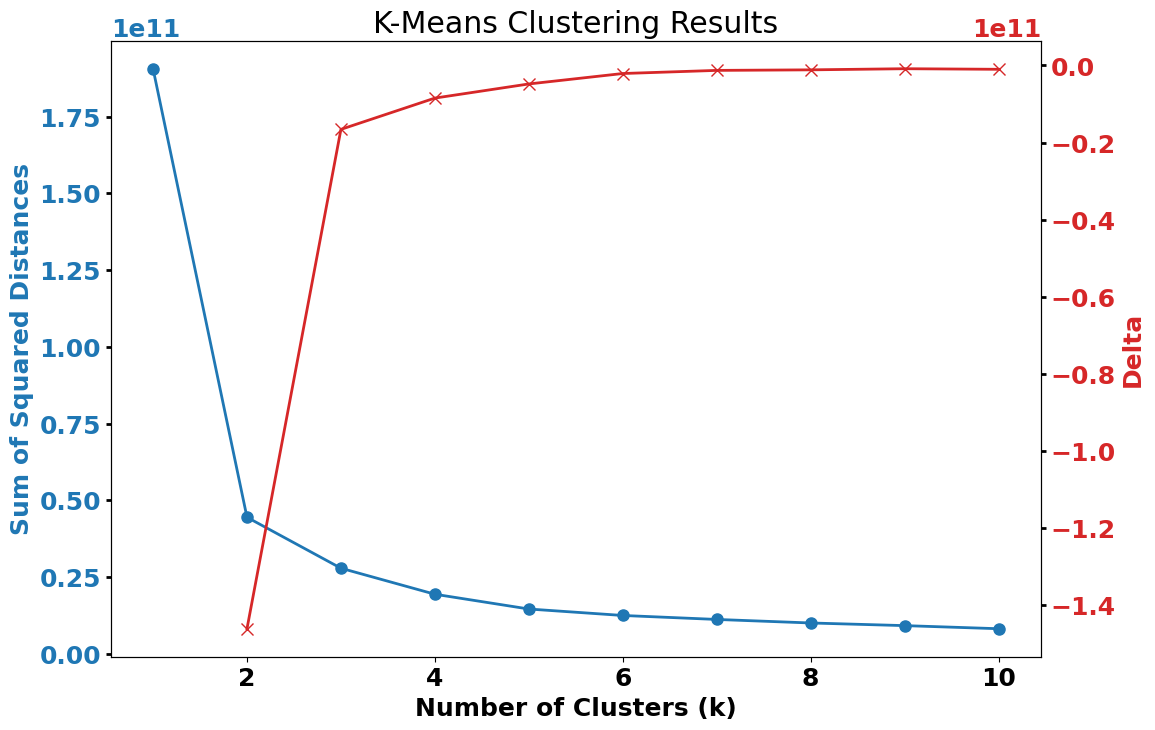

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\charraden\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\charraden\AppData\Local\Temp\ipykernel_49764\385823480.py", line 62, in on_select
    k = int(input("Enter the number of clusters: "))
  File "C:\Users\charraden\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 1177, in raw_input
    return self._input_request(
  File "C:\Users\charraden\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 1219, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user


Enter the number of clusters:  5


KeyboardInterrupt: 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\charraden\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\charraden\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\charraden\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\charraden\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

In [12]:
#Code developed by Cassady Harraden, Mineral Deposit Research Unit, University of British Columbia, July 2024
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import seaborn as sns

# Read the CSV file
def read_csv(file_path):
    return pd.read_csv(file_path)

# Plot Sum of Squared Distances and Delta
def plot_elbow_method(data, columns_to_cluster, max_clusters=10):
    # Filter data by selected columns
    data_to_cluster = data[columns_to_cluster]
    
    sse = []   # Sum of Squared Distances
    delta = [] # Delta (change in SSE)
    prev_sse = 0
    
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_to_cluster)
        sse_curr = kmeans.inertia_
        sse.append(sse_curr)
        
        if k > 1:
            delta.append(sse_curr - prev_sse)
        
        prev_sse = sse_curr
    
    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 8))
    
    plt.rcParams.update({'font.size': 18, 'font.weight': 'bold'})
    
    ax1.set_xlabel('Number of Clusters (k)', fontsize=18, fontweight='bold')
    ax1.set_ylabel('Sum of Squared Distances', color='tab:blue', fontsize=18, fontweight='bold')
    ax1.plot(range(1, max_clusters + 1), sse, marker='o', color='tab:blue', markersize=8, linewidth=2)
    ax1.tick_params(axis='y', labelcolor='tab:blue', width=2)
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Delta', color='tab:red', fontsize=18, fontweight='bold')
    ax2.plot(range(2, max_clusters + 1), delta, marker='x', color='tab:red', markersize=8, linewidth=2)
    ax2.tick_params(axis='y', labelcolor='tab:red', width=2)
    
    plt.title('K-Means Clustering Results')
    plt.show()
    
    return data_to_cluster, sse, delta

# Select Columns for pop-up window selection
def on_select():
    selected = [listbox.get(idx) for idx in listbox.curselection()]
    if not selected:
        messagebox.showerror("Error", "Please select at least one column!")
    else:
        data_to_cluster, sse, delta = plot_elbow_method(data, selected)
        k = int(input("Enter the number of clusters: "))
        
        # Perform k-means clustering on selected columns
        kmeans = KMeans(n_clusters=k, random_state=42)
        data_to_cluster['Cluster'] = kmeans.fit_predict(data_to_cluster)
        
        # Append cluster assignments to the original DataFrame
        for col in data_to_cluster.columns:
            data[col] = data_to_cluster[col]
        
        # Export the DataFrame to a new CSV file
        output_file_path = '19FB-131_Counts_KClusters.csv'  # Replace with output filename
        data.to_csv(output_file_path, index=False)
        
        print(f"Cluster assignments appended and saved to {output_file_path}")
        
        # Destroy the root window after processing
        root.destroy()

# Pop-up window setup
root = tk.Tk()
root.title("Select Columns to Cluster")

# Set directory
current_directory = os.getcwd()
file_path = os.path.join(current_directory, '19FB-131_Counts.csv')

# Read input CSV file
data = read_csv(file_path)

# Create a listbox to display columns
listbox = tk.Listbox(root, selectmode=tk.MULTIPLE, width=50, height=min(len(data.columns), 20))  
for col in data.columns:
    listbox.insert(tk.END, col)
listbox.pack(pady=10)

# Input kclusters - finish processing
button = tk.Button(root, text="Cluster Selected Columns", command=on_select)
button.pack(pady=10)

root.mainloop()
